### Imported libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from tensorflow import keras

### Download training data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [3]:
x_train[1].reshape(-1, 1).shape

(784, 1)

#### Plot the first sample

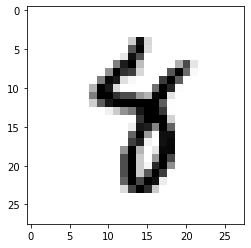

In [5]:
plt.imshow(x_train[np.random.randint(0, 500)], cmap=plt.cm.binary); plt.show()

### Define incredibly simple 1-layer classifier

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train the simple model (without validation data). Do we really get 99% accuracy?

In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0072 - accuracy: 0.9987
Epoch 2/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0055 - accuracy: 0.9989
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0046 - accuracy: 0.9992
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0045 - accuracy: 0.9992
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0057 - accuracy: 0.9988
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0044 - accuracy: 0.9991
Epoch 7/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0043 - accuracy: 0.9991
Epoch 8/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0026 - accuracy: 0.9996
Epoch 9/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
60

In [14]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0498 - accuracy: 0.9789


[0.09959755407099892, 0.9789]

In [29]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1, activation='elu'),
    keras.layers.Dense(1, activation='elu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test),
                      batch_size=1, epochs=1, verbose=1)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 64s 1ms/sample - loss: 1.7205 - accuracy: 0.2954 - val_loss: 1.6490 - val_accuracy: 0.3241


In [30]:
model2.layers[1].weights

[<tf.Variable 'dense_14/kernel:0' shape=(784, 1) dtype=float32, numpy=
 array([[ 2.02189013e-02],
        [-5.80396503e-03],
        [-3.53737548e-02],
        [-1.90898255e-02],
        [ 3.54614258e-02],
        [ 7.38077462e-02],
        [ 2.08790302e-02],
        [ 3.49865556e-02],
        [ 3.66825089e-02],
        [ 7.49924034e-02],
        [-5.02276830e-02],
        [ 4.86641675e-02],
        [-1.54170413e-02],
        [-1.26166716e-02],
        [-3.91033925e-02],
        [ 1.22561096e-05],
        [ 4.14642245e-02],
        [ 7.02554733e-03],
        [-3.07285450e-02],
        [ 2.42492557e-02],
        [-8.97772610e-04],
        [-1.67012289e-02],
        [ 7.92488456e-04],
        [ 3.08529213e-02],
        [-5.38505577e-02],
        [ 6.42537773e-02],
        [ 6.19280338e-02],
        [-1.51211470e-02],
        [-3.29878666e-02],
        [ 7.48133361e-02],
        [-1.53942257e-02],
        [-3.25005576e-02],
        [-1.14319779e-01],
        [ 8.05888921e-02],
        [ 5

In [18]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


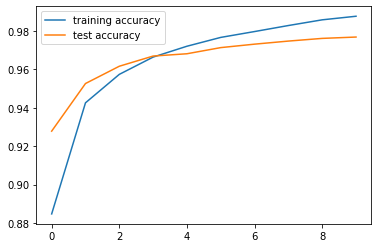

In [19]:
h = history2.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.legend(['training accuracy', 'test accuracy'])

### Add dropout, more layers

In [72]:
x_train[0].shape

(28, 28)

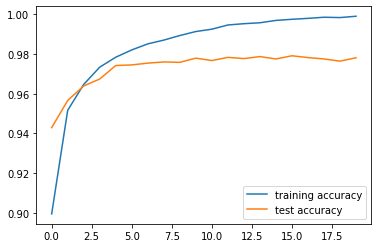

In [67]:
h3 = history3.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.legend(['training accuracy', 'test accuracy'])